In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold

In [2]:
df1 = pd.read_csv('diabetes_prediction_dataset.csv')
df1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
# Data Exploration & Preprocessing
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [4]:
print(df1.describe())

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

In [5]:
print(df1.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [6]:
print(df1.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [7]:
df1 = df1.dropna()
df1['gender'] = df1['gender'].map({'Male': 1, 'Female': 0})

/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


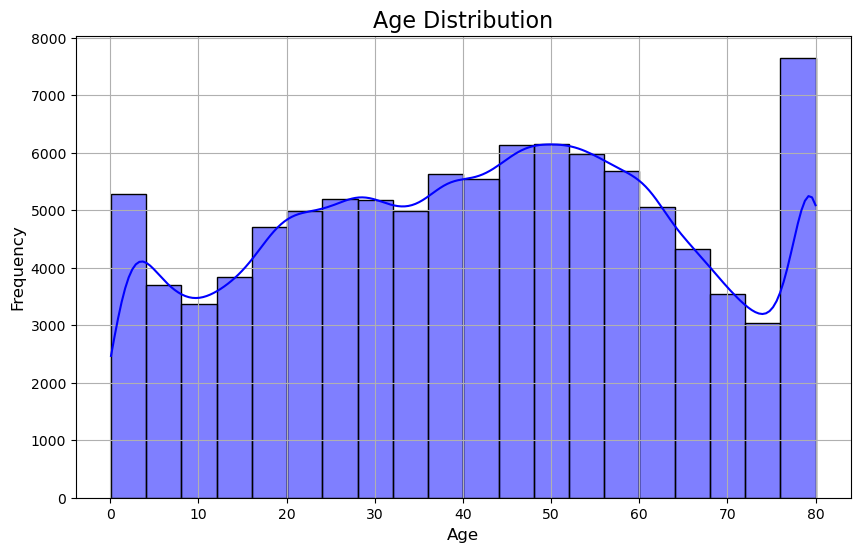

In [8]:
# Plotting Age Distribution
plt.figure(figsize=(10, 6))

# Histogram of Age Distribution
sns.histplot(df1['age'], kde=True, color='blue', bins=20)
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

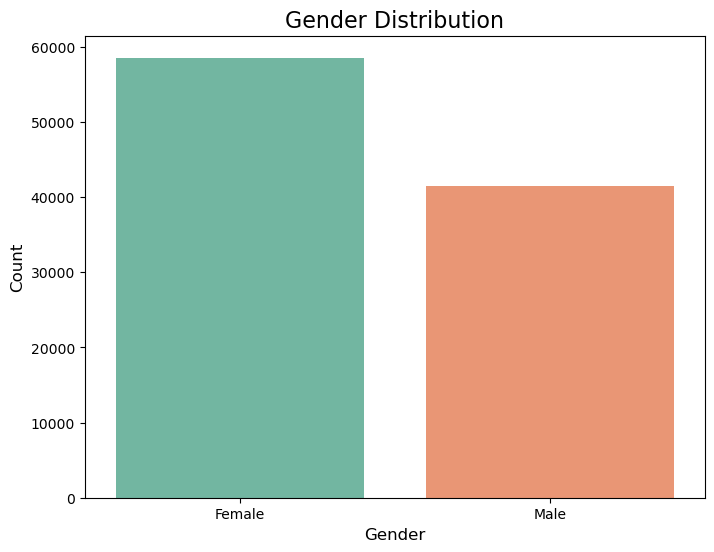

In [9]:
plt.figure(figsize=(8, 6))

# Countplot for Gender Distribution (0 for Female, 1 for Male)
sns.countplot(x=df1['gender'],palette='Set2')


plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0,1], ['Female','Male']) 
plt.show()

/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


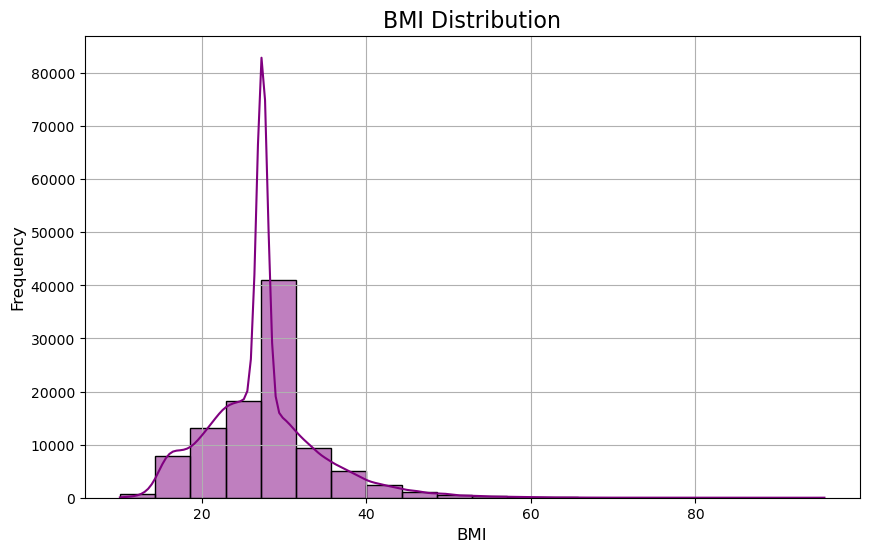

In [10]:
# Plotting BMI Distribution
plt.figure(figsize=(10, 6))

# Histogram with KDE for BMI Distribution
sns.histplot(df1['bmi'], kde=True, color='purple', bins=20)
plt.title('BMI Distribution', fontsize=16)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

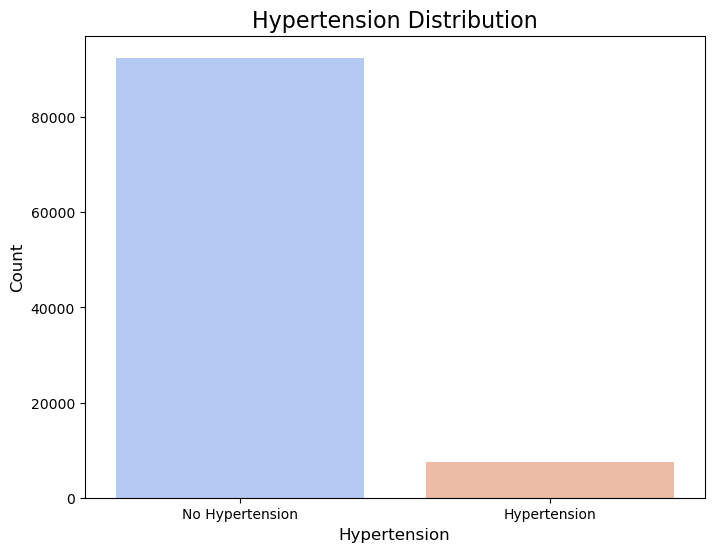

In [11]:
# Plotting Hypertension Distribution
plt.figure(figsize=(8, 6))

# Countplot for Hypertension Distribution (assuming 0 = No, 1 = Yes)
sns.countplot(x=df1['hypertension'], palette='coolwarm')


plt.title('Hypertension Distribution', fontsize=16)
plt.xlabel('Hypertension', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Hypertension', 'Hypertension'])  # Set x-axis labels
plt.show()

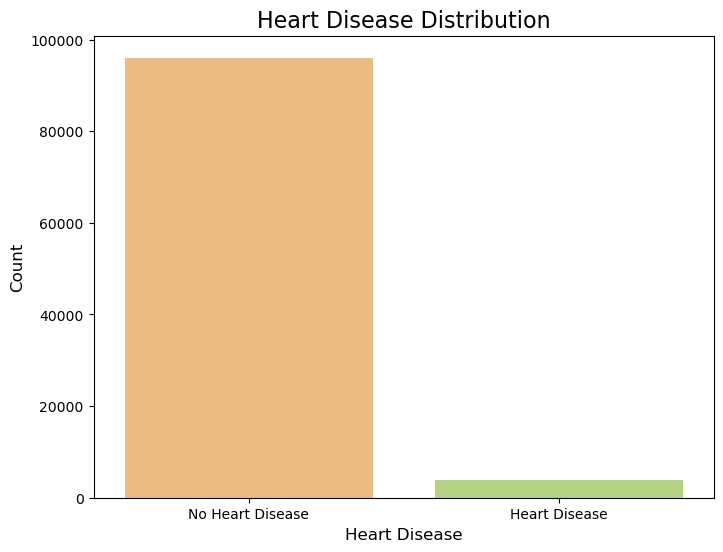

In [12]:
# Plotting Heart Disease Distribution
plt.figure(figsize=(8, 6))

# Countplot for Heart Disease Distribution (assuming 0 = No, 1 = Yes)
sns.countplot(x=df1['heart_disease'], palette='RdYlGn')


plt.title('Heart Disease Distribution', fontsize=16)
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])  # Set x-axis labels
plt.show()

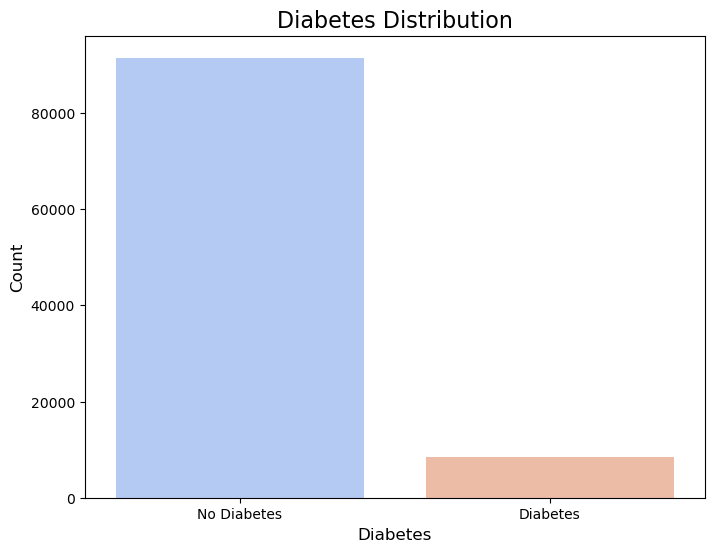

In [13]:
# Plotting Diabetes Distribution
plt.figure(figsize=(8, 6))

# Countplot for Diabetes Distribution (assuming 0 = No, 1 = Yes)
sns.countplot(x=df1['diabetes'], palette='coolwarm')


plt.title('Diabetes Distribution', fontsize=16)
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])  # Set x-axis labels
plt.show()


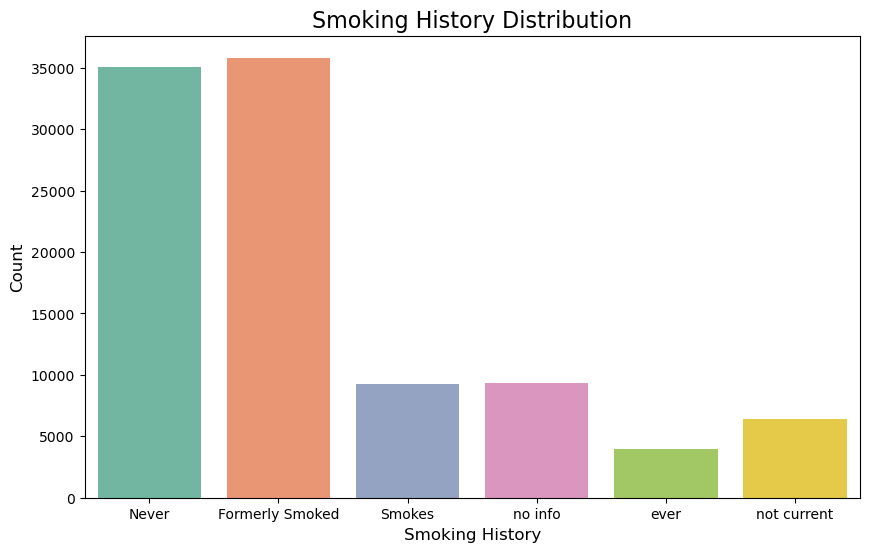

In [14]:
# Plotting Smoking History Distribution
plt.figure(figsize=(10, 6))

# Countplot for Smoking History Distribution
sns.countplot(x=df1['smoking_history'], palette='Set2')


plt.title('Smoking History Distribution', fontsize=16)
plt.xlabel('Smoking History', fontsize=12)
plt.ylabel('Count', fontsize=12)


plt.xticks([0, 1, 2,3,4,5], ['Never', 'Formerly Smoked', 'Smokes','no info','ever','not current']) 

plt.show()

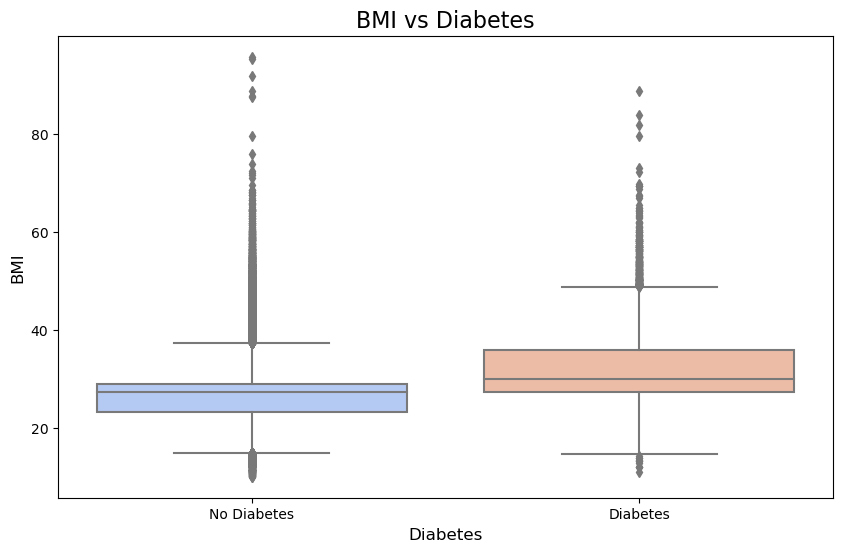

In [15]:
# Plotting BMI vs Diabetes using a Boxplot
plt.figure(figsize=(10, 6))

# Boxplot for BMI vs Diabetes
sns.boxplot(x=df1['diabetes'], y=df1['bmi'], palette='coolwarm')


plt.title('BMI vs Diabetes', fontsize=16)
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])  # Label the x-axis

plt.show()

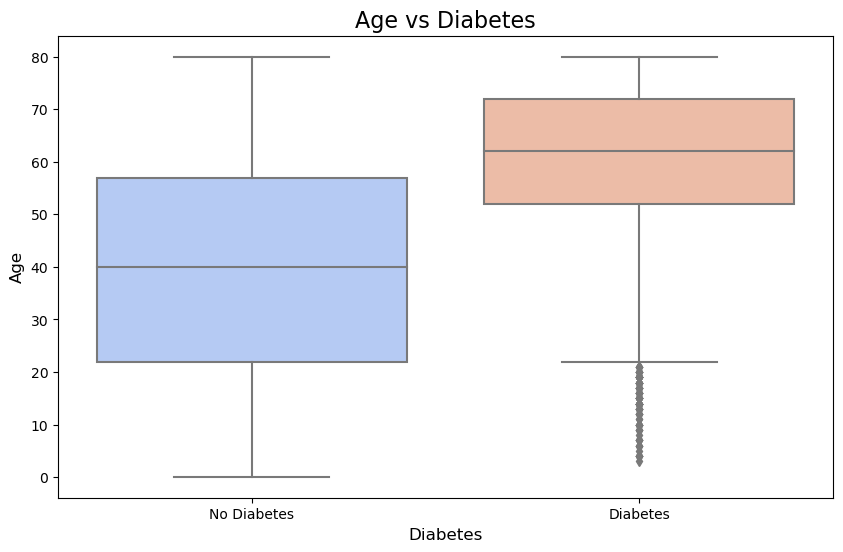

In [16]:
# Plotting Age vs Diabetes using a Boxplot
plt.figure(figsize=(10, 6))

# Boxplot for Age vs Diabetes
sns.boxplot(x=df1['diabetes'], y=df1['age'], palette='coolwarm')


plt.title('Age vs Diabetes', fontsize=16)
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])  # Label the x-axis

plt.show()

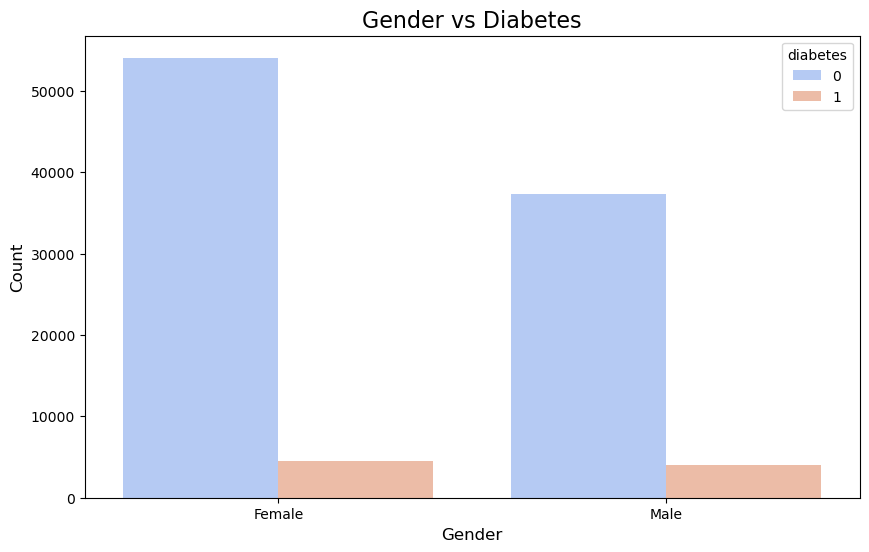

In [17]:
# Plotting Gender vs Diabetes using a Count Plot
plt.figure(figsize=(10, 6))

# Countplot for Gender vs Diabetes
sns.countplot(x='gender', hue='diabetes', data=df1, palette='coolwarm')


plt.title('Gender vs Diabetes', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Female','Male'])  

plt.show()

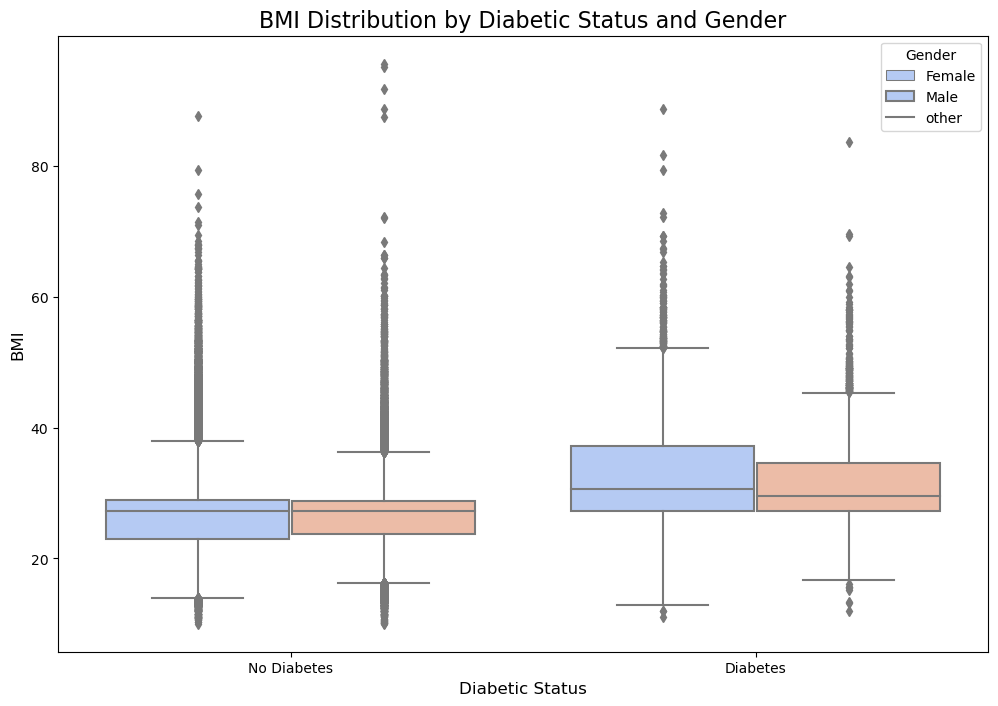

In [18]:
# Plotting BMI distribution by Diabetic Status and Gender using a Boxplot
plt.figure(figsize=(12, 8))

# Boxplot for BMI by Diabetes and Gender
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df1, palette='coolwarm')


plt.title('BMI Distribution by Diabetic Status and Gender', fontsize=16)
plt.xlabel('Diabetic Status', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])  
plt.legend(title='Gender', labels=['Female', 'Male','other'])

plt.show()

In [19]:
# Feature selection and scaling
X = df1.drop('diabetes', axis=1)  # Features
y = df1['diabetes'] 

In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

le = LabelEncoder()
df1['smoking_history'] = le.fit_transform(df1['smoking_history'])  


df1.fillna(df1.mean(), inplace=True)

#  Separate features and target
X = df1.drop('diabetes', axis=1)  
y = df1['diabetes']

# Apply StandardScaler to numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

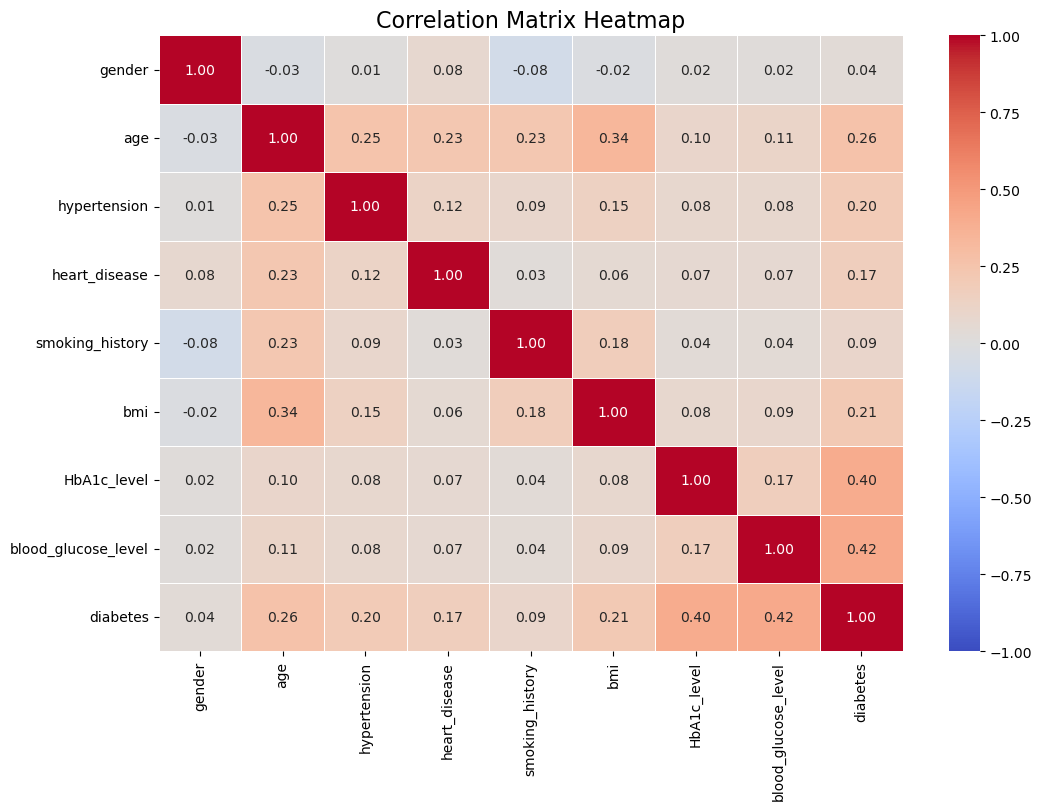

In [21]:

import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df1.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)


plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [23]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}


Model: Random Forest
Cross-Validation Mean Accuracy: 0.9703
Test Accuracy: 0.9705
Precision: 0.9515
Recall: 0.6891
F1-Score: 0.7993
AUC: 0.9653
--------------------------------------------------


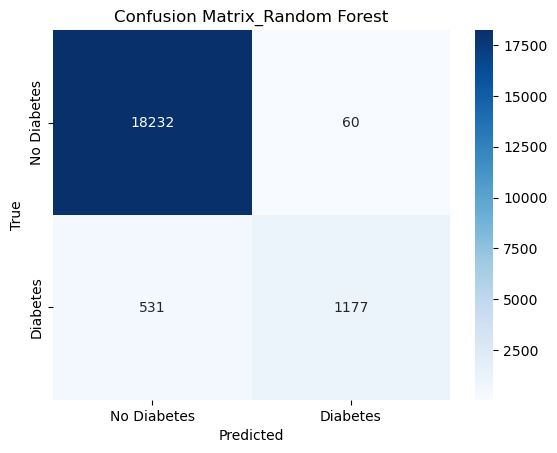

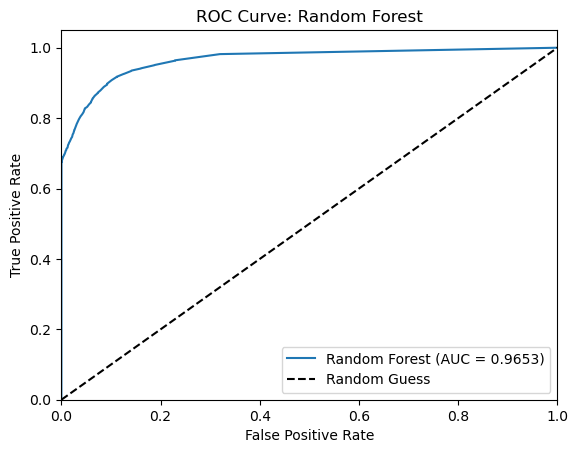

Model: Decision Tree
Cross-Validation Mean Accuracy: 0.9514
Test Accuracy: 0.9525
Precision: 0.7137
Recall: 0.7400
F1-Score: 0.7266
AUC: 0.8565
--------------------------------------------------


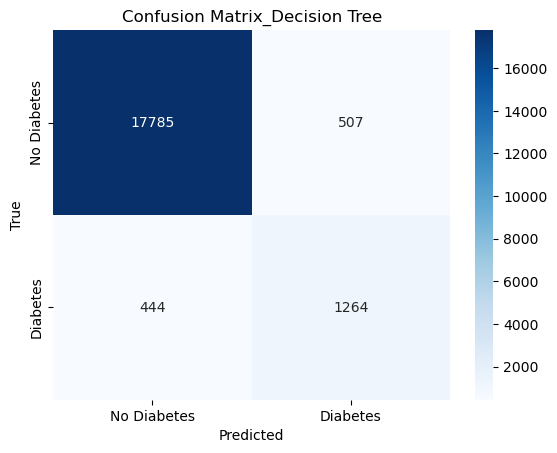

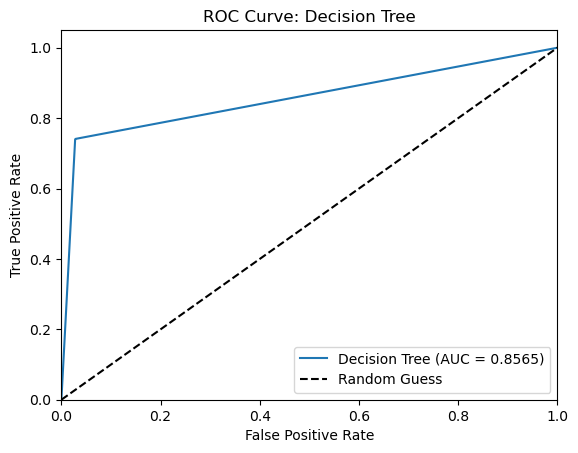

Model: Logistic Regression
Cross-Validation Mean Accuracy: 0.9607
Test Accuracy: 0.9587
Precision: 0.8639
Recall: 0.6130
F1-Score: 0.7171
AUC: 0.9612
--------------------------------------------------


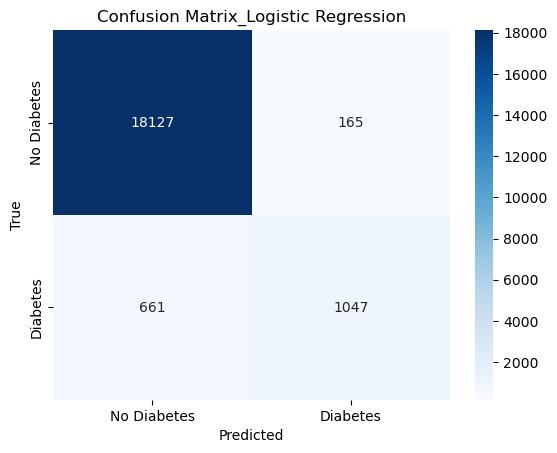

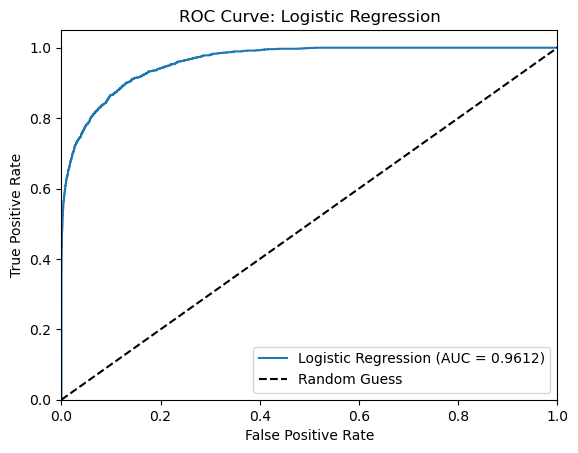

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

results = {}

for model_name, model in models.items():
    # Cross-validation for better model evaluation
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    
    # Train the model on the entire training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None
    
    # Save results
    results[model_name] = {
        'Cross-Validation Mean Accuracy': cv_results.mean(),
        'Test Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc_score
    }

    print(f"Model: {model_name}")
    print(f"Cross-Validation Mean Accuracy: {cv_results.mean():.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    if auc_score is not None:
        print(f"AUC: {auc_score:.4f}")
    else:
        print("AUC: Not available (model does not support probability estimates)")
    print("-" * 50)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix_' + str(model_name))
    plt.show()
    
    # Plot AUC-ROC curve if probability estimates are available
    if y_pred_prob is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        plt.figure()
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.4f})')
        plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve: {model_name}')
        plt.legend(loc="lower right")
        plt.show()

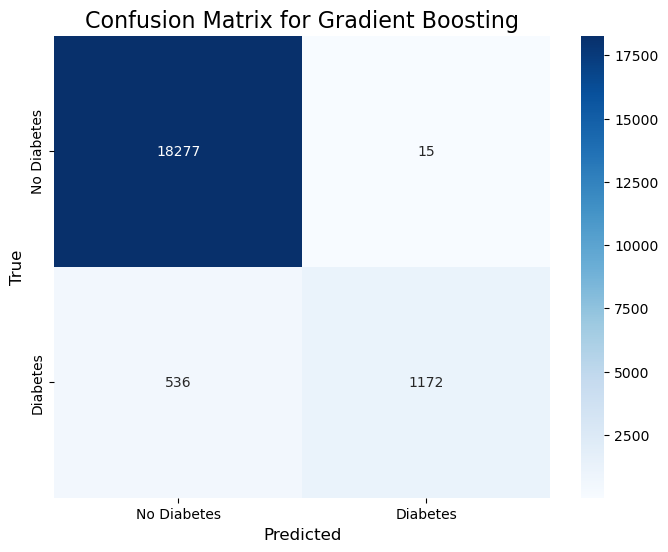

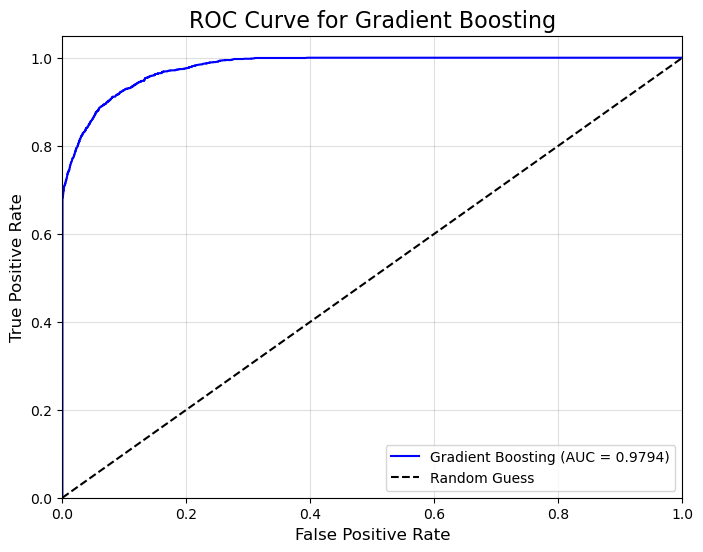

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)
y_pred_prob_gb = gb_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix for Gradient Boosting', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.show()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_gb)
auc_score = roc_auc_score(y_test, y_pred_prob_gb)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {auc_score:.4f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve for Gradient Boosting', fontsize=16)
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()